In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data_path = "aerofit_business_case.csv"
df = pd.read_csv(data_path)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [99]:
df.shape

(180, 9)

In [100]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [101]:
df.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


### Insights based on data structure

    1. There are 3 unique products.
    2. KP281 is the most often purchased product
    3. There is a largee difference between the mean and median of the income and miles, including high standard deviation between the 2 

## Univariate and bivariate Analysis of the count of purchases wrt quantitive metrics (including outlier detection):
    1. Age 
    2. Usage 
    3. Income
    4. Education
    5. Fitness
    6. Mile

<AxesSubplot:xlabel='Miles', ylabel='Count'>

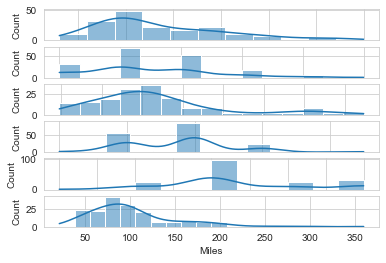

In [102]:
fig, axis = plt.subplots(nrows=6,ncols=1)

sns.histplot(df,x="Age",kde = True,ax=axis[0])
sns.histplot(df,x="Usage",kde = True,ax=axis[1])
sns.histplot(df,x="Income",kde = True,ax=axis[2])
sns.histplot(df,x="Education",kde = True,ax=axis[3])
sns.histplot(df,x="Fitness",kde = True,ax=axis[4])
sns.histplot(df,x="Miles",kde = True,ax=axis[5])

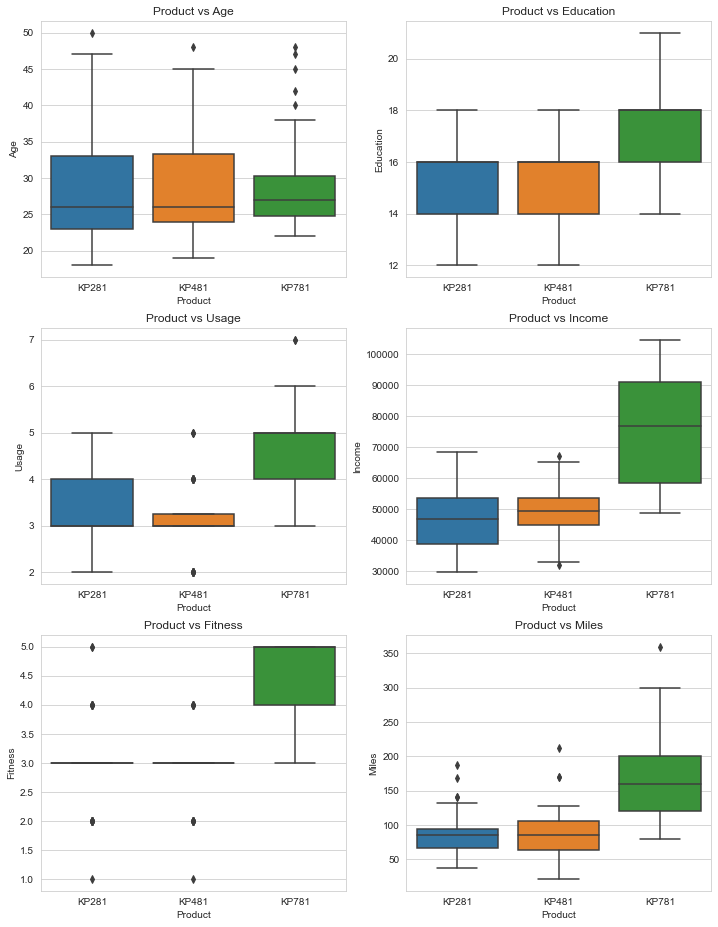

In [103]:
metrics = ["Age","Education","Usage","Income","Fitness","Miles"]
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=[12,16])
count=0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df,x="Product",y=metrics[count],ax=axes[i,j])
        axes[i,j].set_title("Product vs "+metrics[count])
        count+=1
       

#### Product vs Age
-  The KP781 product is more likely to be purchased by customers within age group 25-30
-  Customers purchasing products KP281 & KP481 have the same Age median value.

#### Product vs Education
-  The KP781 product is more likely to be purchased by customers over 16
-  Customers purchasing products KP281 & KP481 are under 16.

#### Product vs Usage
-  The KP781 product is more likely to be purchased by customers who use the tradmill over 4 times a week and KP281 by those less than 4 times a week
-  The KP481 is likely to be purchased by customers using the tradmill over 3 times a week with little range, although there are some outliers at and above 4 times a week

#### Product vs Income
-  The KP781 product is more likely to be purchased by customers with a wide range of income over 60k
-  The lower the mean income of the customers, lower the spec of the product they purchase
-  The income range for the customers purchasing KP481 product is the smallest

#### Product vs Fitness
-  The fitness of customers purchasing KP281 and KP481 are the same, while that of KP781 is higher (>=4), with a larger range
-  The fitness for KP281 and KP481 has many outliers, around the same fitness level.

#### Product vs Miles
-  The KP781 product is more likely to be purchased by customers who run more than 120 miles per week
-  Customers purchasing products KP281 & KP481 have the some outliers, some running over 120 miles week.





 

## Univariate and bivariate Analysis of the count of purchases wrt non-quantitive metrics:
    1. Gender 
    2. Marital Status
    3. Product

<AxesSubplot:xlabel='Product', ylabel='count'>

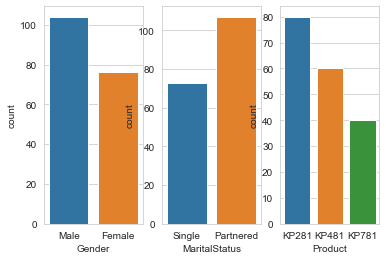

In [104]:
fig, axis = plt.subplots(nrows=1,ncols=3)
sns.countplot(data=df,x="Gender",ax=axis[0])
sns.countplot(data=df,x="MaritalStatus",ax=axis[1])
sns.countplot(data=df,x="Product",ax=axis[2])

# Percentage of customers in each category

In [105]:
df_melt = df[["Gender","MaritalStatus","Product"]].melt()
df_group = df_melt.groupby(["variable","value"])[["value"]].count()

df_group_percent = df_group/df_group.groupby(level=0).sum()
df_group_percent

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

# Bivariate analysis w.r.t non-quantitive measures

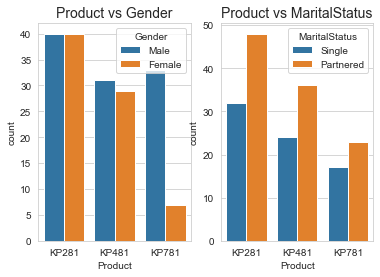

In [106]:

fig, axs = plt.subplots(nrows=1, ncols=2)
sns.countplot(data=df, x='Product', hue='Gender', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', ax=axs[1])
axs[0].set_title("Product vs Gender", fontsize=14)
axs[1].set_title("Product vs MaritalStatus", fontsize=14)
plt.show()

## Multivariate Analysis with quantitive and non-quantitive attributes

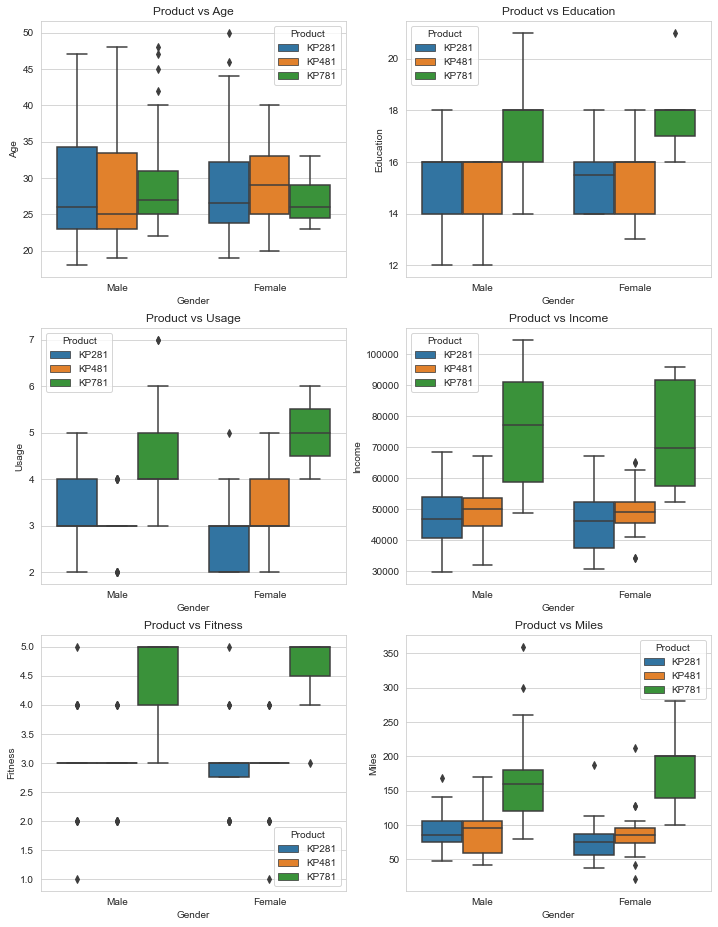

In [107]:
metrics = ["Age","Education","Usage","Income","Fitness","Miles"]
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=[12,16])
count=0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df,x="Gender",y=metrics[count],hue = "Product", ax=axes[i,j])
        axes[i,j].set_title("Product vs "+metrics[count])
        count+=1

-  Females using tradmill over 5 times a week  and males using treadmills between 4-5 times a week are more likely to buy KP781 product
-  Females using treadmill between 2-3 times a week and males between 3-4 are more likely to buy the KP281 product

-  Among those who run lesser miles, Males running more miles (75-100) than women (55-80) are likely to purchase KP281 treasmills
-  Among those who run more miles, females running more miles(145-200) than men(125-175) are more likely to purchase the KP781 product 

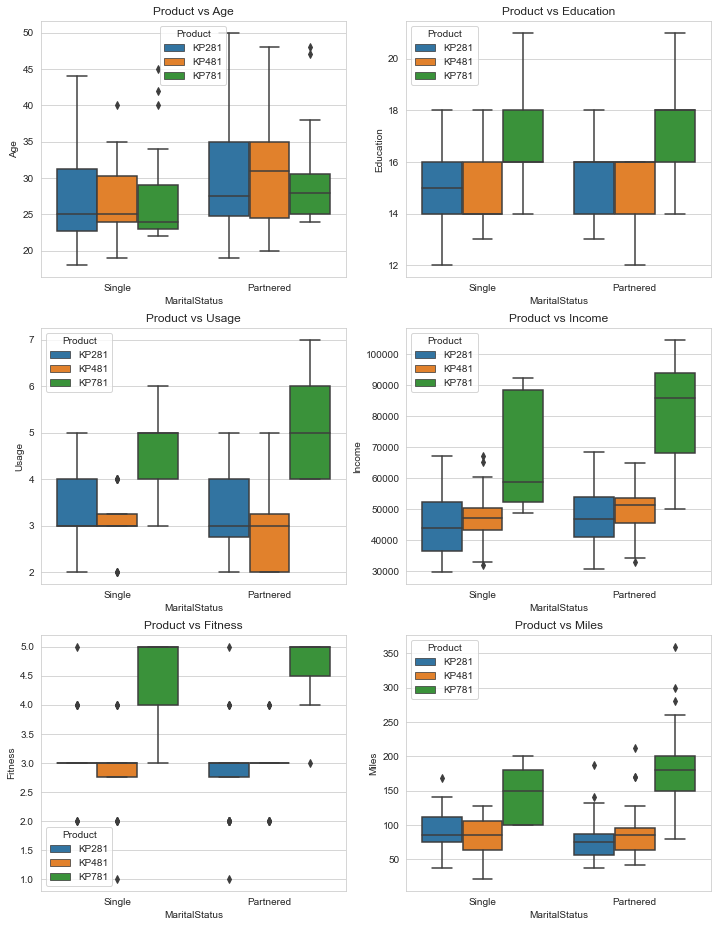

In [135]:
metrics = ["Age","Education","Usage","Income","Fitness","Miles"]
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=[12,16])
count=0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df,x="MaritalStatus",y=metrics[count],hue = "Product", ax=axes[i,j])
        axes[i,j].set_title("Product vs "+metrics[count])
        count+=1

-  Partnered people with usage over 5 times a week are more likely to buy KP781 treadmill 

## Conditional Probability

### Of Gender and Marital Status

In [130]:
def p_prod_given_attr(attr,value,marginal_prob):
    #if value not in df[attr]:
        #return "Invalid value for attribute"
    df_pd_attr_norm = pd.crosstab(index=df[attr],columns=[df["Product"]],normalize='index')
    df_pd_attr= pd.crosstab(index=df[attr],columns=[df["Product"]],normalize=True)
    print("\n")
    print(f"P(KP781/{value}):{df_pd_attr['KP781'][value]}")
    print(f"P(KP481/{value}):{df_pd_attr['KP481'][value]}")
    print(f"P(KP281/{value}):{df_pd_attr['KP281'][value]}")
    
    for i in range(len(marginal_prob)):
        print(f"P({marginal_prob[i]}):{df_pd_attr.loc[marginal_prob[i]].sum()}")
    return df_pd_attr_norm
    
p_prod_given_attr("Gender","Male",["Male","Female"])



P(KP781/Male):0.18333333333333332
P(KP481/Male):0.17222222222222222
P(KP281/Male):0.2222222222222222
P(Male):0.5777777777777777
P(Female):0.42222222222222217


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [134]:
p_prod_given_attr("MaritalStatus","Partnered",["Single","Partnered"])



P(KP781/Partnered):0.12777777777777777
P(KP481/Partnered):0.2
P(KP281/Partnered):0.26666666666666666
P(Single):0.40555555555555556
P(Partnered):0.5944444444444444


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


In [ ]:
'Male' in df["Gender"]

In [132]:
df_test=pd.crosstab(index=df['MaritalStatus'],columns=[df["Product"]])

In [133]:
df_test

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17
